# In this analysis we will provide the ratio of statistical tests including u-test, t-test and brunner w test

# In the end of notebook we add heatmap and line plots of the results

## imports

In [1]:
conf_int = 0.99
seed_lim = 30
"test type can be utest, brunner, t_test"
test_type = 'brunner'
estimated_max_val = 120
sample_size = 10000

In [2]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display
     

In [3]:
from src.RQ1_forecast import *

In [4]:
from numpy import random

def sampling_group(all_mapes, seed_lim):
    # assert (2 * seed_lim) < 100
    # total_sample = random.choice(all_mapes, (2*seed_lim), replace=False)
    func_sample_0 = random.choice(all_mapes, seed_lim, replace=False)
    func_sample_1 = random.choice(all_mapes, seed_lim, replace=False)
    # func_sample_0 = total_sample[0:seed_lim]
    # func_sample_1 = total_sample[seed_lim:(2*seed_lim)]

    return func_sample_0, func_sample_1


def utest(sample_0, sample_1, confidence_interval, test_type):
    # calculating the u test
    from scipy.stats import mannwhitneyu, ttest_ind, brunnermunzel, ks_2samp

    # we use the alternative less whcih means. the distribution underlying x is stochastically less than the distribution underlying y
    U1, p_utest = mannwhitneyu(sample_0, sample_1)
    w, p_brunner = brunnermunzel(sample_0, sample_1, alternative='two-sided')
    ks_prob, p_ks = ks_2samp(sample_0, sample_1)
    stat_t, p_t = ttest_ind(sample_0, sample_1)

    p_val_dict = {
        'utest': p_utest,
        'brunner': p_brunner,
        't_test': p_t,
        'ks': p_ks,
    }

    p = p_val_dict[test_type]
    p_lim = 1.0 - confidence_interval
    # print(f'pvalue{p}\t plim{p_lim}')
    # sample_0 is not lower than sample_1
    if p > p_lim:
        return 0
    # sample_0 is lower than sample_1
    else:
        return 1
        
def ratio_exp(mape_arr, seed_lim, sampling_lim, confidence_interval, test_type):
    "gets an array of mape scores, then sample 2 sample of seed_lim size, afterwards perform the utest"
    ratio = np.zeros(sampling_lim)
    for i in range(sampling_lim):
        sample_0, sample_1 = sampling_group(mape_arr, seed_lim=seed_lim)
        # sample_1 = sample_1*100
        # sample_0 = sample_0*100
        ratio[i] = utest(sample_0, sample_1, confidence_interval=confidence_interval, test_type=test_type)
    return(ratio[ratio==1].shape[0])

In [5]:
pd.options.display.max_columns = None

In [6]:
def plot_kde(arr, conf_name, dataset_name, add_title=False):
    pd.Series(arr).plot.kde(0.5, linewidth=3)
    
    plt.xlabel('MAPE')
    # plt.title(f'deep{conf_name}_{dataset_name}')
    if(dataset_name == 'electricity_both_ep100'):
        plt.xlim(-1,12)
        if add_title:
            plt.title('electricity_both_ep100', fontsize=26)
    elif(dataset_name == 'exchange_rate_both_ep100'):
        plt.xlim(-1,12)
        if add_title:
            plt.title('exchange rate_both_ep100', fontsize=26)
    elif(dataset_name == 'solar_nips_both_ep100'):
        plt.xlim(-1,12)
        if add_title:
            plt.title('solar nips_both_ep100', fontsize=26)
    elif(dataset_name == 'traffic_nips_both_ep100'):
        plt.xlim(-1,6)
        if add_title:
            plt.title('traffic nips_both_ep100', fontsize=26)
    plt.savefig(f"/home/dev/deepts/plots/kde_func/epoch100/kde_{conf_name}_{dataset_name}", dpi=900)
    plt.show()


def mape_mean_array_dataset(conf_name, dataset_name, add_title=False):
    with open(f'/home/dev/deepts/configs/ks_config_{conf_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
    data_address_val=config[dataset_name]

    metrics_list1_val = read_csv_result('metrics.csv', data_address_val)
    mape_dataset = np.zeros(len(metrics_list1_val))
    for idx, metric_elem in enumerate(metrics_list1_val):
        mape_dataset[idx] = metric_elem['MAPE'].mean()
    # plot_kde(mape_dataset, conf_name=conf_name, dataset_name=dataset_name, add_title=add_title)
    return mape_dataset

In [7]:
# fixing the seeds here
seed_of_seed = 0
np.random.seed(seed_of_seed)
import random as rnd
rnd.seed(seed_of_seed)



In [8]:
mape1 = [0, 0, 3, 7, 4, 0, 0, 3]
mape2 = [120, 237, 432, 345, 567]

from scipy.stats import mannwhitneyu, ttest_ind
mannwhitneyu(mape1, mape2, alternative='two-sided'), mannwhitneyu(mape1, mape2, alternative='less'), mannwhitneyu(mape1, mape2, alternative='greater'), ttest_ind(mape1, mape2)

(MannwhitneyuResult(statistic=0.0, pvalue=0.0037478271960266754),
 MannwhitneyuResult(statistic=0.0, pvalue=0.0018739135980133377),
 MannwhitneyuResult(statistic=0.0, pvalue=0.9988454265660994),
 Ttest_indResult(statistic=-5.699802926825022, pvalue=0.00013823142015013308))

In [9]:
mape1 = [0, 0, 3, 7, 4, 0, 0, 3, 0, 0, 3, 7, 4, 0, 0, 3, 0, 0, 3, 7, 4, 0, 0, 3, 0, 0, 3, 7, 4, 0, 0, 3]
mape2 = [120, 237, 432, 345, 567, 120, 237, 432, 345, 567, 120, 237, 432, 345, 567, 120, 237, 432, 345, 567]

from scipy.stats import mannwhitneyu, ttest_ind
mannwhitneyu(mape1, mape2, alternative='two-sided'), mannwhitneyu(mape1, mape2, alternative='less'), mannwhitneyu(mape1, mape2, alternative='greater'), ttest_ind(mape1, mape2)

(MannwhitneyuResult(statistic=0.0, pvalue=9.39578290184341e-10),
 MannwhitneyuResult(statistic=0.0, pvalue=4.697891450921705e-10),
 MannwhitneyuResult(statistic=0.0, pvalue=0.9999999995834861),
 Ttest_indResult(statistic=-12.152020670848998, pvalue=1.5362613279816154e-16))

In [10]:
# sampele_0, sample_1 = sampling_group(deepstate_mape_traf_arr, seed_lim=20)

In [11]:
# pd.Series(sample_1).plot.kde(0.5, linewidth=3)

In [12]:
# pd.Series(sampele_0).plot.kde(0.5, linewidth=3)

## Get all the mapes

In [13]:
deepstate_mape_elec_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "electricity")
deepstate_mape_exch_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "exchange_rate")
deepstate_mape_traf_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "traffic_nips")
deepstate_mape_sola_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "solar_nips")


101it [00:00, 32905.45it/s]
100%|##########| 100/100 [00:00<00:00, 117.30it/s]
101it [00:00, 38683.65it/s]
100%|##########| 100/100 [00:00<00:00, 400.15it/s]
101it [00:00, 38599.06it/s]
100%|###########| 100/100 [00:02<00:00, 48.70it/s]
101it [00:00, 34080.83it/s]
100%|##########| 100/100 [00:00<00:00, 196.17it/s]


In [14]:
deepar_mape_elec_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "electricity", add_title=True)
deepar_mape_exch_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "exchange_rate", add_title=True)
deepar_mape_traf_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "traffic_nips", add_title=True)
deepar_mape_sola_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "solar_nips", add_title=True)

101it [00:00, 33677.14it/s]
100%|##########| 100/100 [00:00<00:00, 117.72it/s]
201it [00:00, 43222.51it/s]
100%|##########| 100/100 [00:00<00:00, 413.41it/s]
101it [00:00, 33134.51it/s]
100%|###########| 100/100 [00:02<00:00, 49.73it/s]
201it [00:00, 42394.40it/s]
100%|##########| 100/100 [00:00<00:00, 207.45it/s]


In [15]:
deepfactor_mape_elec_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "electricity")
deepfactor_mape_exch_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "exchange_rate")
deepfactor_mape_traf_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "traffic_nips")
deepfactor_mape_sola_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "solar_nips")

101it [00:00, 34499.94it/s]
100%|##########| 100/100 [00:00<00:00, 129.60it/s]
101it [00:00, 28696.97it/s]
100%|##########| 100/100 [00:00<00:00, 412.35it/s]
101it [00:00, 39004.21it/s]
100%|###########| 100/100 [00:01<00:00, 51.56it/s]
101it [00:00, 38092.32it/s]
100%|##########| 100/100 [00:00<00:00, 205.38it/s]


In [16]:
nbeats_mape_elec_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "electricity")
nbeats_mape_exch_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "exchange_rate")
nbeats_mape_traf_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "traffic_nips")
nbeats_mape_sola_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips")

101it [00:00, 33435.26it/s]
100%|##########| 100/100 [00:00<00:00, 128.16it/s]
101it [00:00, 35065.37it/s]
100%|##########| 100/100 [00:00<00:00, 414.08it/s]
101it [00:00, 38729.63it/s]
100%|###########| 100/100 [00:01<00:00, 50.90it/s]
101it [00:00, 37854.05it/s]
100%|##########| 100/100 [00:00<00:00, 206.19it/s]


In [17]:
lstm_mape_elec_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "electricity")
lstm_mape_exch_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "exchange_rate")
lstm_mape_traf_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "traffic_nips")
lstm_mape_sola_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "solar_nips")

101it [00:00, 27445.72it/s]
100%|##########| 100/100 [00:00<00:00, 142.25it/s]
101it [00:00, 29963.55it/s]
100%|##########| 100/100 [00:00<00:00, 410.05it/s]
101it [00:00, 31856.27it/s]
100%|###########| 100/100 [00:01<00:00, 59.18it/s]
101it [00:00, 30308.70it/s]
100%|##########| 100/100 [00:00<00:00, 215.81it/s]


## Sample mape values, then perform the utest

In [18]:
# fix the seed for 20 epochs to 0
# fixing the seeds here
seed_of_seed = 0
np.random.seed(seed_of_seed)
import random as rnd
rnd.seed(seed_of_seed)

In [19]:
# deepar_elec_ratio = ratio_exp(deepar_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepar_exch_ratio = ratio_exp(deepar_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepar_traf_ratio = ratio_exp(deepar_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepar_sola_ratio = ratio_exp(deepar_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

# deepstate_elec_ratio = ratio_exp(deepstate_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepstate_exch_ratio = ratio_exp(deepstate_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepstate_traf_ratio = ratio_exp(deepstate_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepstate_sola_ratio = ratio_exp(deepstate_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

# deepfactor_elec_ratio = ratio_exp(deepfactor_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepfactor_exch_ratio = ratio_exp(deepfactor_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepfactor_traf_ratio = ratio_exp(deepfactor_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# deepfactor_sola_ratio = ratio_exp(deepfactor_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

# nbeats_elec_ratio = ratio_exp(nbeats_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# nbeats_exch_ratio = ratio_exp(nbeats_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# nbeats_traf_ratio = ratio_exp(nbeats_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# nbeats_sola_ratio = ratio_exp(nbeats_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

# lstm_elec_ratio = ratio_exp(lstm_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# lstm_exch_ratio = ratio_exp(lstm_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# lstm_traf_ratio = ratio_exp(lstm_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
# lstm_sola_ratio = ratio_exp(lstm_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

# [deepstate_elec_ratio, deepstate_exch_ratio, deepstate_traf_ratio, deepstate_sola_ratio]

In [20]:
# experiments_array_ep20 = np.array([     [deepar_elec_ratio, deepar_exch_ratio, deepar_traf_ratio, deepar_sola_ratio],
#                                         [deepstate_elec_ratio, deepstate_exch_ratio, deepstate_traf_ratio, deepstate_sola_ratio],
#                                         [deepfactor_elec_ratio, deepfactor_exch_ratio, deepfactor_traf_ratio, deepfactor_sola_ratio],
#                                         [nbeats_elec_ratio, nbeats_exch_ratio, nbeats_traf_ratio, nbeats_sola_ratio],
#                                         [lstm_elec_ratio, lstm_exch_ratio, lstm_traf_ratio, lstm_sola_ratio],
#                              ]
#                      )

In [21]:
# experiments_df_ep20 = pd.DataFrame(data=experiments_array_ep20, 
#                               index=['deepar', 'deepstate', 'deepfactor', 'nbeats', 'lstm'], 
#                               columns=['electricity', 'exchange_rate', 'trafics', 'solar'])
# experiments_df_ep20

In [22]:
# import seaborn as sb
# fig, ax = plt.subplots(figsize=(20, 10))
# sb.heatmap(experiments_df_ep20, cmap="Blues")
# # plt.savefig(f"/home/dev/deepts/plots/heatmap_epoch20_seeds{seed_lim}_{test_type}_size{sample_size}_conf{conf_int}.png", dpi=1000)
# plt.show()

# 100 epochs

In [23]:
# fix the seed for 100 epochs to 0
# fixing the seeds here
seed_of_seed = 0
np.random.seed(seed_of_seed)
import random as rnd
rnd.seed(seed_of_seed)

In [24]:
deepstate_mape_elec_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "electricity_both_ep100")
deepstate_mape_exch_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "exchange_rate_both_ep100")
deepstate_mape_traf_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "traffic_nips_both_ep100")
deepstate_mape_sola_arr = mape_mean_array_dataset(conf_name = 'state', dataset_name = "solar_nips_both_ep100")

deepar_mape_elec_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "electricity_both_ep100")
deepar_mape_exch_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "exchange_rate_both_ep100")
deepar_mape_traf_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "traffic_nips_both_ep100")
deepar_mape_sola_arr = mape_mean_array_dataset(conf_name = 'ar', dataset_name = "solar_nips_both_ep100")

deepfactor_mape_elec_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "electricity_both_ep100")
deepfactor_mape_exch_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "exchange_rate_both_ep100")
deepfactor_mape_traf_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "traffic_nips_both_ep100")
deepfactor_mape_sola_arr = mape_mean_array_dataset(conf_name = 'factor', dataset_name = "solar_nips_both_ep100")

nbeats_mape_elec_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "electricity_both_ep100")
nbeats_mape_exch_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "exchange_rate_both_ep100")
nbeats_mape_traf_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "traffic_nips_both_ep100")
nbeats_mape_sola_arr = mape_mean_array_dataset(conf_name = 'nbeats', dataset_name = "solar_nips_both_ep100")

lstm_mape_elec_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "electricity_both_ep100")
lstm_mape_exch_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "exchange_rate_both_ep100")
lstm_mape_traf_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "traffic_nips_both_ep100")
lstm_mape_sola_arr = mape_mean_array_dataset(conf_name = 'lstm', dataset_name = "solar_nips_both_ep100")

101it [00:00, 32239.32it/s]
100%|##########| 100/100 [00:00<00:00, 142.46it/s]
101it [00:00, 34237.83it/s]
100%|##########| 100/100 [00:00<00:00, 404.73it/s]
101it [00:00, 33741.51it/s]
100%|###########| 100/100 [00:01<00:00, 59.20it/s]
101it [00:00, 31176.38it/s]
100%|##########| 100/100 [00:00<00:00, 215.07it/s]
101it [00:00, 34516.80it/s]
100%|##########| 100/100 [00:00<00:00, 140.05it/s]
105it [00:00, 33490.64it/s]
100%|##########| 104/104 [00:00<00:00, 411.27it/s]
101it [00:00, 37622.09it/s]
100%|###########| 100/100 [00:01<00:00, 60.01it/s]
101it [00:00, 32709.81it/s]
100%|##########| 100/100 [00:00<00:00, 216.99it/s]
101it [00:00, 37072.26it/s]
100%|##########| 100/100 [00:00<00:00, 131.45it/s]
101it [00:00, 35108.96it/s]
100%|##########| 100/100 [00:00<00:00, 409.23it/s]
101it [00:00, 36528.82it/s]
100%|###########| 100/100 [00:01<00:00, 59.81it/s]
101it [00:00, 33720.03it/s]
100%|##########| 100/100 [00:00<00:00, 212.62it/s]
101it [00:00, 32765.47it/s]
100%|##########| 100/100

In [25]:
deepar_elec_ratio = ratio_exp(deepar_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepar_exch_ratio = ratio_exp(deepar_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepar_traf_ratio = ratio_exp(deepar_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepar_sola_ratio = ratio_exp(deepar_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

deepstate_elec_ratio = ratio_exp(deepstate_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepstate_exch_ratio = ratio_exp(deepstate_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepstate_traf_ratio = ratio_exp(deepstate_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepstate_sola_ratio = ratio_exp(deepstate_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

deepfactor_elec_ratio = ratio_exp(deepfactor_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepfactor_exch_ratio = ratio_exp(deepfactor_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepfactor_traf_ratio = ratio_exp(deepfactor_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
deepfactor_sola_ratio = ratio_exp(deepfactor_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

nbeats_elec_ratio = ratio_exp(nbeats_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
nbeats_exch_ratio = ratio_exp(nbeats_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
nbeats_traf_ratio = ratio_exp(nbeats_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
nbeats_sola_ratio = ratio_exp(nbeats_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

lstm_elec_ratio = ratio_exp(lstm_mape_elec_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
lstm_exch_ratio = ratio_exp(lstm_mape_exch_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
lstm_traf_ratio = ratio_exp(lstm_mape_traf_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)
lstm_sola_ratio = ratio_exp(lstm_mape_sola_arr, seed_lim=seed_lim, sampling_lim=sample_size, confidence_interval=conf_int, test_type=test_type)

In [26]:
experiments_array_ep100 = np.array([[deepar_elec_ratio, deepar_exch_ratio, deepar_traf_ratio, deepar_sola_ratio],
                              [deepstate_elec_ratio, deepstate_exch_ratio, deepstate_traf_ratio, deepstate_sola_ratio],
                              [deepfactor_elec_ratio, deepfactor_exch_ratio, deepfactor_traf_ratio, deepfactor_sola_ratio],
                              [nbeats_elec_ratio, nbeats_exch_ratio, nbeats_traf_ratio, nbeats_sola_ratio],
                              [lstm_elec_ratio, lstm_exch_ratio, lstm_traf_ratio, lstm_sola_ratio],
                             ]
                     )

In [27]:
experiments_df_ep100 = pd.DataFrame(data=experiments_array_ep100, 
                              index=['deepar', 'deepstate', 'deepfactor', 'nbeats', 'lstm'], 
                              columns=['electricity', 'exchange_rate', 'trafics', 'solar'])
experiments_df_ep100

,electricity,exchange_rate,trafics,solar
deepar,5,4,2,1
deepstate,2,2,1,4
deepfactor,1,9,3,3
nbeats,3,3,4,3
lstm,3,8,3,3


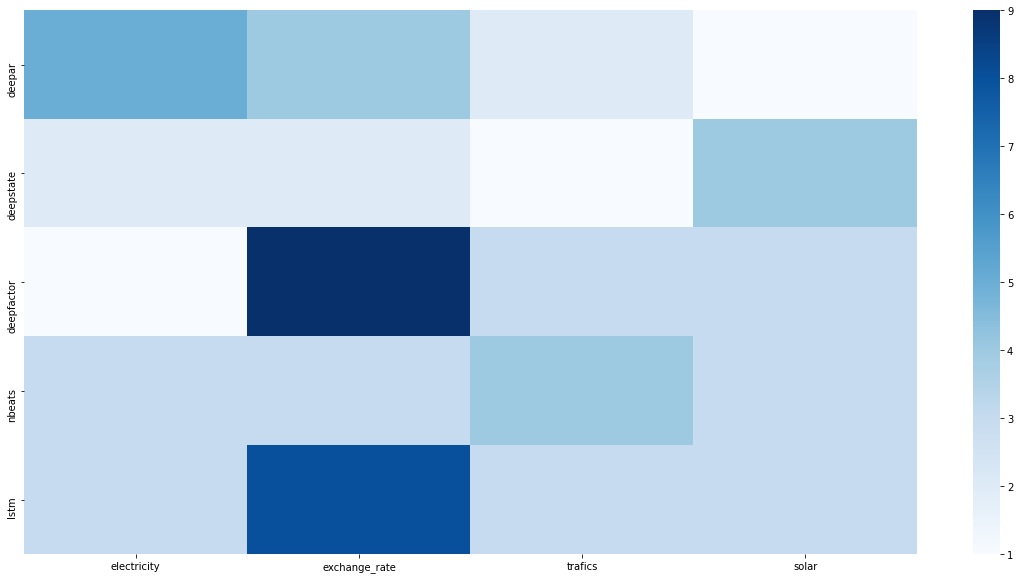

In [28]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(experiments_df_ep100, cmap="Blues")
# plt.savefig(f"/home/dev/deepts/plots/heatmap_epoch100_seeds{seed_lim}_{test_type}_size{sample_size}_conf{conf_int}.png", dpi=1000)
plt.show()

In [29]:
# # plot both of them together
# import seaborn as sb

# actual_max_val = max(experiments_array_ep100.max(), experiments_array_ep20.max())



# fig, axis = plt.subplots(1, 2, figsize=(20, 10)) 
# sb.heatmap(experiments_df_ep100, cmap="Blues", vmin=0, vmax=estimated_max_val, ax=axis[0], cbar=False)
# sb.heatmap(experiments_df_ep20, cmap="Blues", vmin=0, vmax=estimated_max_val, ax=axis[1])
# axis[0].set_title("trained for 100 epochs")
# axis[1].set_title("trained for 20 epochs")
# # plt.savefig(f"/home/dev/deepts/plots/heatmap_both__seeds{seed_lim}_{test_type}_size{sample_size}_conf{conf_int}.png", dpi=1000)
# plt.show()

In [30]:
# actual_max_val

In [31]:
experiments_df_ep100.to_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds{seed_lim}_{test_type}_size{sample_size}_conf{conf_int}_withlstm.csv")
# experiments_df_ep20.to_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep20_seeds{seed_lim}_{test_type}_size{sample_size}_conf{conf_int}_withlstm.csv")

# Read the csv of the results

In [8]:
"test type can be utest, brunner, t_test"
test_type_df = 'brunner'
# estimated_max_val = 120
sample_size_df = 10000

ep_seed5_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds5_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])
ep_seed10_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds10_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])
ep_seed15_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds15_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])
ep_seed20_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds20_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])
ep_seed25_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds25_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])
ep_seed30_ep100_df = pd.read_csv(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_ep100_seeds30_{test_type_df}_size{sample_size_df}_conf{conf_int}_withlstm.csv",  index_col=[0])


# make the heatmap

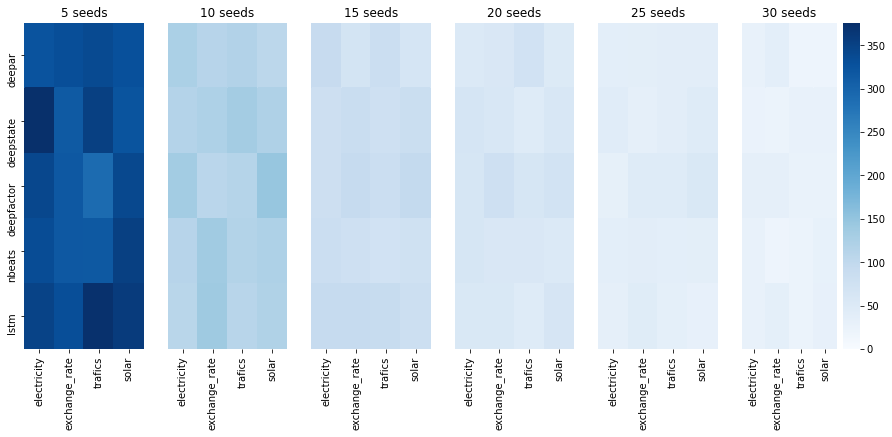

In [ ]:
# ploting all the 100 seeds in a row
import seaborn as sb

max_val = max(ep_seed5_ep100_df.max().max(), ep_seed10_ep100_df.max().max(), ep_seed15_ep100_df.max().max(), ep_seed20_ep100_df.max().max(), ep_seed30_ep100_df.max().max())
# max_val = 400

fig, axis = plt.subplots(1, 6, figsize=(15, 6)) 
sb.heatmap(ep_seed5_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[0], cbar=False)
axis[0].set_title("5 seeds")
sb.heatmap(ep_seed10_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[1], cbar=False)
axis[1].set_title("10 seeds")
axis[1].set_yticks([])

sb.heatmap(ep_seed15_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[2], cbar=False)
axis[2].set_title("15 seeds")
axis[2].set_yticks([])

sb.heatmap(ep_seed20_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[3], cbar=False)
axis[3].set_title("20 seeds")
axis[3].set_yticks([])

sb.heatmap(ep_seed25_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[4], cbar=False)
axis[4].set_title("25 seeds")
axis[4].set_yticks([])

sb.heatmap(ep_seed30_ep100_df, cmap="Blues", vmin=0, vmax=max_val, ax=axis[5])
axis[5].set_title("30 seeds")
axis[5].set_yticks([])

plt.savefig(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_all_{test_type_df}_conf{conf_int}_unmasked.png", dpi=500)
plt.show()

In [ ]:
ep_seed5_ep100_df.max().max()

376

In [ ]:
def mask_df(my_df, threshold=5):
    masked_df = my_df.mask(my_df < threshold, 0)
    masked_df = masked_df.mask(masked_df >= threshold, 1)
    return masked_df

In [ ]:
threshold = 100

ep_seed5_ep100_df_masked  =   mask_df(ep_seed5_ep100_df    , threshold=threshold)  
ep_seed10_ep100_df_masked =   mask_df(ep_seed10_ep100_df   , threshold=threshold)
ep_seed15_ep100_df_masked =   mask_df(ep_seed15_ep100_df   , threshold=threshold)
ep_seed20_ep100_df_masked =   mask_df(ep_seed20_ep100_df   , threshold=threshold)
ep_seed25_ep100_df_masked =   mask_df(ep_seed25_ep100_df   , threshold=threshold)
ep_seed30_ep100_df_masked =   mask_df(ep_seed30_ep100_df   , threshold=threshold)

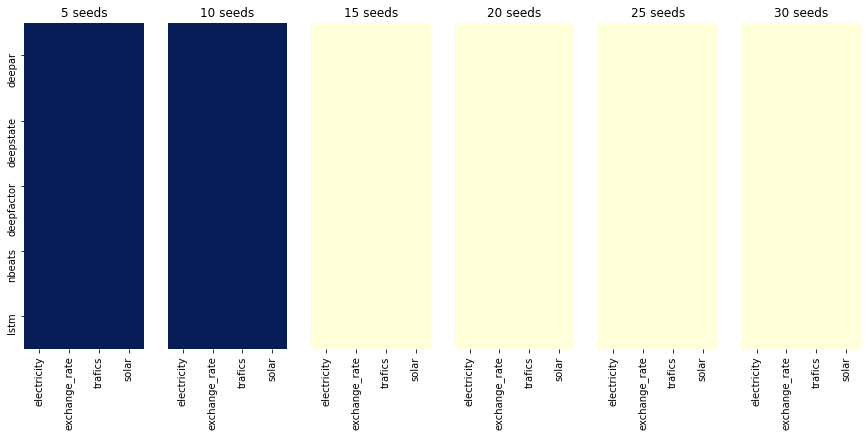

In [ ]:
# ploting all the 100 seeds in a row
import seaborn as sb

# max_val = max(ep_seed5_ep100_df.max(), ep_seed10_ep100_df.max(), ep_seed15_ep100_df.max(), ep_seed20_ep100_df.max(), ep_seed30_ep100_df.max())
max_val = 1

fig, axis = plt.subplots(1, 6, figsize=(15, 6)) 
sb.heatmap(ep_seed5_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[0], cbar=False, center=0.5)
axis[0].set_title("5 seeds")
sb.heatmap(ep_seed10_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[1], cbar=False, center=0.5)
axis[1].set_title("10 seeds")
axis[1].set_yticks([])

sb.heatmap(ep_seed15_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[2], cbar=False, center=0.5)
axis[2].set_title("15 seeds")
axis[2].set_yticks([])

sb.heatmap(ep_seed20_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[3], cbar=False, center=0.5)
axis[3].set_title("20 seeds")
axis[3].set_yticks([])

sb.heatmap(ep_seed25_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[4], cbar=False, center=0.5)
axis[4].set_title("25 seeds")
axis[4].set_yticks([])

sb.heatmap(ep_seed30_ep100_df_masked, cmap="YlGnBu", vmin=0, vmax=max_val, ax=axis[5], cbar=False, center=0.5)
axis[5].set_title("30 seeds")
axis[5].set_yticks([])

plt.savefig(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/heatmap_all_{test_type_df}_conf{conf_int}__masked{threshold}.png", dpi=500)
plt.show()

# Make line plot

In [9]:
def change_df_format(df_func, sample_size):
    df_func['model'] = df_func.index
    df_func = pd.melt(df_func, id_vars=['model'], value_vars=['electricity', 'exchange_rate', 'trafics', 'solar'], var_name='dataset', value_name='alpha')
    df_func['sample'] = sample_size
    return df_func

In [10]:
df_seed5 = change_df_format(ep_seed5_ep100_df, 5)
df_seed10 = change_df_format(ep_seed10_ep100_df, 10)
df_seed15 = change_df_format(ep_seed15_ep100_df, 15)
df_seed20 = change_df_format(ep_seed20_ep100_df, 20)
df_seed25 = change_df_format(ep_seed25_ep100_df, 25)
df_seed30 = change_df_format(ep_seed30_ep100_df, 30)
df_total = pd.concat([df_seed5, df_seed10, df_seed15, df_seed20, df_seed25, df_seed30])
df_total


,model,dataset,alpha,sample
0,deepar,electricity,325,5
1,deepstate,electricity,376,5
2,deepfactor,electricity,343,5
3,nbeats,electricity,335,5
4,lstm,electricity,349,5
...,...,...,...,...
15,deepar,solar,20,30
16,deepstate,solar,29,30
17,deepfactor,solar,27,30
18,nbeats,solar,30,30


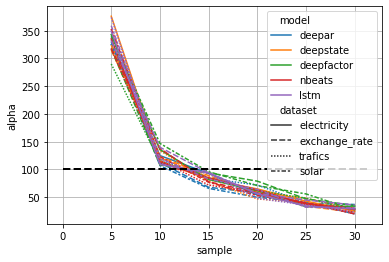

In [11]:
import seaborn as sb
ALPHA = 100

fig = sb.lineplot(data=df_total, x='sample', y='alpha', hue='model', style='dataset', ci=None)
plt.plot([0, plt.xlim()[-1]], [ALPHA, ALPHA],
        color='black', marker=None, linestyle='dashed', linewidth=2, )
plt.grid(True, which='both')
plt.savefig(f"/home/dev/deepts/experiments/image_classification/heatmap/complete/line_all_{test_type_df}_conf{conf_int}_500.png", dpi=500)
plt.show()